SCIKIT-LEARN -- META ESTIMATORS

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer, f1_score
from sklego.meta import Thresholder
# import make_plots
from pipe import Pipeline

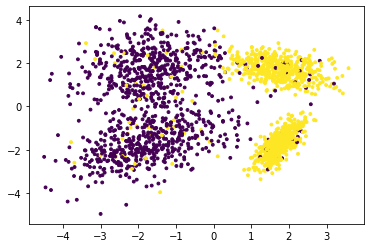

In [7]:
X, y = make_classification(n_samples = 2000, n_classes = 2, n_features = 2,
                           n_redundant = 0, random_state = 21,
                           class_sep = 1.75, flip_y = 0.1)

plt.scatter(X[:,0], X[:,1], c = y, s = 8)

In [11]:
clf1 = LogisticRegression().fit(X, y)
clf2 = KNeighborsClassifier(n_neighbors = 10).fit(X, y)
clf3 = VotingClassifier(estimators=[('clf1' , clf1), ('clf2', clf2)],
                       voting='soft',
                       weights = [0.1, 0.9])
clf3.fit(X, y)

# plt.make_plots(clf3)
# plot_output()

VotingClassifier(estimators=[('clf1', LogisticRegression()),
                             ('clf2', KNeighborsClassifier(n_neighbors=10))],
                 voting='soft', weights=[0.1, 0.9])

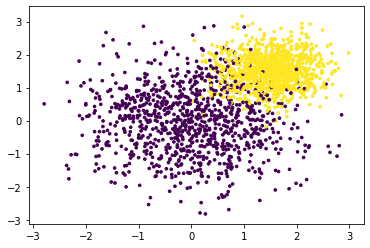

In [37]:
X,y = make_blobs(2000,centers=[(0,0),(1.5,1.5)], cluster_std=[1,0.5])
plt.scatter(X[:,0],X[:,1] ,c = y, s = 7)

In [41]:
m1 = Thresholder(LogisticRegression(), threshold = 0.1).fit(X, y)
m2 = Thresholder(LogisticRegression(), threshold = 0.9).fit(X, y)
m1,m2

(Thresholder(model=LogisticRegression(), threshold=0.1),
 Thresholder(model=LogisticRegression(), threshold=0.9))

In [ ]:
feature_pipeline = P